In [24]:
class Point:
    def __init__(self, x=None, y=None):        
        self.coord = None
        if (x is not None) and (y is not None):
            self.coord = (x,y)
        else:
            self.coord = (10,10) #int(random.random() * 200)



In [25]:
import numpy as np

class Individ:
    def __init__(self, step, size): 
        self.route = np.random.randint(-1,2, size=(2,size))*step  #   step*(-1) / step*1 / step*0
        self.individ_size = size
        self.fitness = 0
        self.setfitness()
        
    def setfitness(self):    #start_point = (x,y)
        global start_point
        global end_point
        global gameField
        cumsum = np.cumsum(self.route, axis=1) + np.array(start_point).reshape((2,1))
        index = self.checkblocks(cumsum, gameField)
        #print ('cumsum ', cumsum[:, index])
        distance = np.linalg.norm(cumsum[:, index] - np.array(end_point))      
        self.fitness = distance    # check normalization   
        
    def getfitness(self):
        return self.fitness
    
    def checkblocks(self, cumsum, our_field):
        global gameField
        for i in range(1, self.individ_size):
            if (any(cumsum[:, i] < 0) or (cumsum[0, i] >= gameField.field_size[0]) or (cumsum[1, i] >= gameField.field_size[1])):
                return i-1 
            elif gameField.getvalue(cumsum[0, i], cumsum[1, i]):
                return i-1
        return self.individ_size-1
    
    def getFinalRoute(self):
        global start_point
        global end_point
        global gameField
        cumsum = np.cumsum(self.route, axis=1) + np.array(start_point).reshape((2,1))
        index = self.checkblocks(cumsum, gameField)
        return cumsum[:, :index+1]
    
        

In [329]:
import numpy as np

class Field:
    def __init__(self, size):
        self.matrix = np.zeros(size)
        self.matrix[0, :] = 1
        self.matrix[:, 0] = 1
        self.matrix[:, size[1]-1] = 1
        self.matrix[size[0]-1, :] = 1
        self.field_size = size
    
    def addSquareBlock(self, left_top, right_bottom):  #point = (x,y)
        for i in range(left_top[0], right_bottom[0]):
            for j in range(left_top[1],right_bottom[1]):
                self.matrix[i, j] = 1
                
    def addCircle(self, center, radius): # center = (x,y)
        for i in range(min(0,center[0]-radius), max(self.field_size[0],center[0]+radius)):
            for j in range(min(0,center[1]-radius), max(self.field_size[1],center[1]+radius)):
                if (center[0]-i)**2+(center[1]-j)**2 <= radius**2:
                    self.matrix[i, j] = 1
    
    # add diff shapes of blocks
        
    def getmatrix(self):
        return self.matrix
    
    def getvalue(self,x,y):
        return self.matrix[x,y]
    
    def cart2pol(x, y):
        rho = np.sqrt(x**2 + y**2)
        phi = np.arctan2(y, x)
        return(rho, phi)

    def pol2cart(rho, phi):
        x = rho * np.cos(phi)
        y = rho * np.sin(phi)
        return(x, y)

    
    def newstar(self, start, height): #two triangles
        #coef = width/height
        coef = 1
        #self.matrix[start[0], start[1]] = 1
        for i in range(1, int(0.2*height)+1):
            coef = 1
            for j in range(0, i):
                self.matrix[start[0]+i, start[1]+int(j*coef)] = 1
                self.matrix[start[0]+i, start[1]-int(j*coef)] = 1
                self.matrix[start[0]+i, start[1]] = 1
                
        #coef = width/height     

        for i in range(int(0.2*height+1), int(0.8*height-1)):
            
            for j in range(0, i):
                self.matrix[start[0]+i, start[1]+int(j*coef)] = 1
                self.matrix[start[0]+i, start[1]-int(j*coef)] = 1
                self.matrix[start[0]+i, start[1]] = 1
            #coef = coef - 0.01     
        for i in range(int(0.2*height)+1, int(height)):
            for j in range(int(0.8*height-i), 0, -1):
                self.matrix[start[0]+i, start[1]+int(j*coef)] = 1
                self.matrix[start[0]+i, start[1]-int(j*coef)] = 1
                self.matrix[start[0]+i, start[1]] = 1
                
        for i in range(int(0.8*height)-1, height+1):
            coef = 1
            for j in range(int(height-i-2), -1, -1):
                self.matrix[start[0]+i, start[1]+int(j*coef)] = 1
                self.matrix[start[0]+i, start[1]-int(j*coef)] = 1
                self.matrix[start[0]+i, start[1]] = 1
            #coef = coef + 0.01
        #self.matrix[start[0]+int(0.8*height+1), start[1]] = 1
        
    
    def teststar(self, center, numberOfPoints, amplitude = 1, rotationAngle=0.9*np.pi): #in polar coordinates
        rotation=0.9*np.pi
        step = (8e-4*np.pi)*10#(numberOfPoints-1)*np.pi)
        function = lambda stop:N.arange(0, stop, step)
        # Determine the angles that the arm tips are at
        theta = function((numberOfPoints-1)*np.pi) 
        # Define distance from the arm tip to the center of star.
        phi = list(np.sin(rotation)/np.sin(rotation-function(((numberOfPoints-1)/(numberOfPoints))*np.pi)))*numberOfPoints 
        phi = phi[:len(phi)-(len(phi)-len(theta))]
        # Get x and y coordinates of the arm tips.
        x = (amplitude * np.cos(theta) + center[0])* np.cos(phi)
        y = (amplitude * np.sin(theta) + center[1])* np.sin(phi)
        for i in range(0, len(x)):
            self.matrix[int(x[i]), int(y[i])] = 1
            #print ('coord ', coord)
            #print ('round ', int(coord[0]), int(coord[1]))
        print('x ', len(x), x[:10])
        print('y ', len(y), y[:10])

        

[  0.00000000e+00   2.51327412e-03   5.02654825e-03 ...,   1.25588308e+01
   1.25613441e+01   1.25638573e+01] 5000 5000
0.0025132741228718345


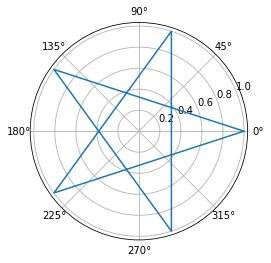

In [99]:
import pylab as P,numpy as N
S=N.sin
p=N.pi
a=.9*p
d=8e-4*p
A=lambda t:N.arange(0,t,d)
print(A(4*p), len(A(4*p)), len(list(S(a)/S(a-A(.8*p)))*5))
print(d)
P.polar(A(4*p),list(S(a)/S(a-A(.8*p)))*5)
P.show()

In [28]:
import operator

class Population:
    def __init__(self, step, individSize, populationSize): #, start_point, end_point, our_field):
        self.population = []
        #self.fitness = []
        for i in range(0, populationSize):
            newInd = Individ(step, individSize) #, start_point, end_point, our_field)
            self.population.append(newInd)            
            #self.fitness.append(newInd.fitness)
                
    def getFitness(self):
        fitness = [x.fitness for x in self.population]
        return fitness
        #return self.fitness
    
    def getBest(self,n):        
        #sortedPopulation = [pop for _,pop in sorted(zip(self.fitness, self.population), key = lambda x: x[0])]    
        sortedPopulation = sorted(self.population,key=operator.attrgetter("fitness"))
        if n==1:
            return sortedPopulation[0]
        else:
            return sortedPopulation[:n]
    
    def add_individ(self, newIndivid):
        self.population.append(newIndivid)
        #self.fitness.append(newIndivid.fitness)
        
    
        
    
    

In [29]:
import random
import copy
from copy import deepcopy
class GA:
    def __init__(self, user_mutationRate, user_crossoverProbability, user_elitism, 
                 user_crossoverFunction, user_parentSelection, user_tournamentSize=None):
        
        self.mutationRate = user_mutationRate
        #self.tournamentSize = 10
        self.crossoverProbability = user_crossoverProbability
        self.elitism = user_elitism
        self.tournamentSize = user_tournamentSize
        self.numOfParents = 2 #for crossover
        
        if user_crossoverFunction == 1:
            self.crossover = self.crossover_1point
        elif user_crossoverFunction == 2:
            self.crossover = self.crossover_2point
            
        if user_parentSelection == 'wheel':
            self.chooseParents = self.chooseParents_wheel
        elif user_parentSelection == 'tournament':
            self.chooseParents = self.chooseParents_tournament
        elif user_parentSelection == 'elit_tournament':
            self.chooseParents = self.chooseParents_elittournament
        
    def CreateFirstPopulation(self, user_step, user_individSize, user_populationSize):
        initialPop = Population(step=user_step, individSize=user_individSize, populationSize=user_populationSize)                                 
        return initialPop
        
    def chooseParents_wheel(self, generation):
        reversed_fitness = 1.0/np.array(generation.getFitness())
        select_prob = reversed_fitness/sum(reversed_fitness)
        selected = np.random.choice(generation.population, self.numOfParents, replace=False)#p=select_prob, replace=False)
        return list(selected)
    
    def chooseParents_tournament(self, generation):
        ''' Eficiency depends on tournament size '''
        parents = []
        
        for j in range(0, self.numOfParents):
            selection = []
            for i in range(0, self.tournamentSize):
                randomId = random.randint(0, len(generation.population)-1)#int(random.randrange(0, len(generation.population)))
                selection.append(generation.population[randomId])
           # print ('selection ', selection)
            parents.append(self.getFittestForTournament(selection))
            print('parent fitness ', parents[j].fitness)
            
        return list(parents)
    
    def chooseParents_elittournament(self, generation):
        ''' Generation could easily degenerate, but for small cases works faster '''
        parents = []
        
        for j in range(0, self.numOfParents):
            selection = self.getFittestForTournament(generation, self.tournamentSize)
            randomId = int(random.randrange(0, len(selection)))
            parents.append(selection[randomId])
            #print ('selection ', selection)
            print('parent fitness ', parents[j].fitness)
        return list(parents)
    
    def getFittestForTournament(self, selection, number = None):
        '''rita'''
        if number:
            population = {}
            for i in range(0, len(selection.population)):
                population[selection.population[i].getfitness()] = selection.population[i]
            fittest = [population[key] for key in sorted(population)[:number]]
            print('length of fittest ', len(fittest))
            return fittest
                
        else:
            fittest = selection[0]
            for s in selection:
                if fittest.getfitness() >= s.getfitness():
                    fittest = s
            return fittest
    
    def get_breakes(self,n):
        break1,break2 = random.sample(range(0, n), 2)
        if break1<break2: 
            return(break1,break2)
        else:
            return(break2,break1)
    
    def crossover_2point(self, parents):        
        children = copy.deepcopy(parents)
        pp = random.random()
        if pp <= self.crossoverProbability:  
            startPos,endPos = self.get_breakes(parents[0].individ_size) 
            children[0].route[:, startPos:endPos], children[1].route[:, startPos:endPos] = \
                copy.deepcopy(children[1].route[:, startPos:endPos]), copy.deepcopy(children[0].route[:, startPos:endPos])                  
        return children
    
    def crossover_1point(self, parents):        
        children = copy.deepcopy(parents)
        pp = random.random()
        if pp <= self.crossoverProbability:  
            startPos = random.randint(0,parents[0].individ_size)
            children[0].route[:, startPos:], children[1].route[:, startPos:] = \
                copy.deepcopy(children[1].route[:, startPos:]), copy.deepcopy(children[0].route[:, startPos:])                
        return children
    
    def mutate(self, children):
        if random.random() < self.mutationRate:
            indx = random.randint(0, children[0].individ_size-1)
            children[0].route[0, indx], children[0].route[1, indx] = children[0].route[1, indx].copy(), children[0].route[0, indx].copy()
            
        if random.random() < self.mutationRate:
            indx = random.randint(0, children[1].individ_size-1)
            children[1].route[0, indx], children[1].route[1, indx] = children[1].route[1, indx].copy(), children[1].route[0, indx].copy()
            #print ('mutation ....................................................................')
        return children
    
    def fittest(self, child_list, n): # n - how much return
        child_list.sort(key = lambda x: x.fitness)
        return child_list[:n]
              
        
    def evolve(self, step, individSize, populationSize, generation, user_chooseFromAll):  #generation - previous population

        children_list = []
        for i in range(populationSize):
            #choose parents
            parents = self.chooseParents(generation)

            #make 2 children
            children = self.crossover(parents)

            #mutate
            children = self.mutate(children)

            children[0].setfitness()
            children[1].setfitness() 
            
            children_list = children_list + children
        
    
        #Create new generation with elitism?
        if user_chooseFromAll:
            newPopulation = Population(step = step, individSize = individSize, populationSize = 0)                                        
            for child in children_list:
                generation.add_individ(child)
            best_individs = generation.getBest(populationSize)
            for individ in best_individs:
                newPopulation.add_individ(individ)
        else:
            newPopulation = Population(step = step, individSize = individSize, populationSize = 0)                                        
            if self.elitism:
                newPopulation.add_individ(generation.getBest(1))                
                best_children = self.fittest(children_list, populationSize-1)
            else:
                best_children = self.fittest(children_list, populationSize)
            for child in best_children:
                newPopulation.add_individ(child)       
                                 
        return newPopulation
        

In [44]:
# common parameters for all users
gameField = Field(size = (100, 100))
gameField.addSquareBlock((41,20),(100,40))
gameField.addSquareBlock((0,60),(59,80))
gameField.teststar((10,10), 2)
#gameField.addSquareBlock((40,60),(60,70))
#gameField.addCircle((70,70),10)

start_point = (50, 10)
end_point = (50, 90)

# parameters of one user
mutationRate=0.2
crossoverProbability=0.7
elitism=True
step=2
individSize=150
populationSize=100
chooseFromAll = False
crossoverFunc = 2
parentFunc = 'wheel'   #'wheel', 'tournament'(for tournament - small tournament size 2-3),'elit_tournament'(for elit big tournamentSize)
tournamentSize = 2 #or None


ga = GA(user_mutationRate=mutationRate, user_crossoverProbability=crossoverProbability, user_elitism=elitism,
       user_crossoverFunction = crossoverFunc, user_parentSelection = parentFunc, user_tournamentSize = tournamentSize) 
initialPop = ga.CreateFirstPopulation(user_step=step, user_individSize=individSize, user_populationSize=populationSize)
print('min fitness ', min(initialPop.getFitness()))
print('evolve function: ')
while not any(np.array(initialPop.getFitness()) == 0):
    initialPop = ga.evolve(step = step, individSize = individSize, populationSize = populationSize, generation = initialPop, 
                          user_chooseFromAll = chooseFromAll)    
    #print('all fitness ', initialPop.getFitness())
    print('min fitness ', min(initialPop.getFitness()))

best_individ = initialPop.getBest(1)

4
x  4 [ 13.          11.62090692   8.75155949   7.03002251]
y  4 [ 10.          12.52441295  12.72789228  10.42336002]
min fitness  54.0370243444
evolve function: 
min fitness  54.0370243444
min fitness  54.0370243444
min fitness  52.9528091795
min fitness  42.0475920833
min fitness  42.0475920833
min fitness  36.8781778292
min fitness  36.8781778292
min fitness  35.77708764
min fitness  32.0
min fitness  32.0
min fitness  27.2029410175
min fitness  27.2029410175
min fitness  27.2029410175
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.0831891576
min fitness  24.08

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
route = best_individ.getFinalRoute()
matr = gameField.matrix
for i in range(len(route[0])):
    matr[route[0][i], route[1][i]] = 2
im = plt.imshow(matr)
im.figure

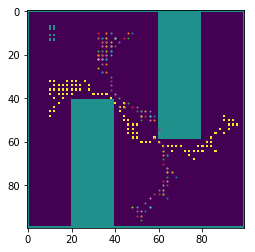

In [42]:
import matplotlib.pyplot as plt
route = best_individ.getFinalRoute()
matr = gameField.matrix
for i in range(len(route[0])):
    matr[route[0][i], route[1][i]] = 2
fig, ax = plt.subplots()
ax.imshow(gameField.matrix)
#ax.scatter(start_point[0], start_point[1],s=5)
#ax.scatter(end_point[0], end_point[1],s=5)
for i in range(len(route[0])):
    ax.scatter(route[0][i], route[1][i],s=1)
plt.show()
#fig.savefig('test.png',dpi=500)

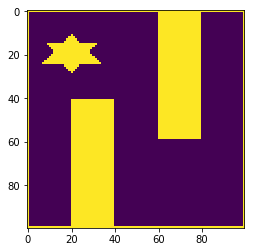

In [330]:
import matplotlib.pyplot as plt
gameField = Field(size = (100, 100))
gameField.addSquareBlock((41,20),(100,40))
gameField.addSquareBlock((0,60),(59,80))
gameField.newstar((10,20), 20)

matr = gameField.matrix

im = plt.imshow(matr)
im.figure